<a href="https://colab.research.google.com/github/pranavkotak8/ML/blob/master/ML_Experiment4_J024_Pranav_Kotak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# useful for many scientific computing in Python
import numpy as np 
import pandas as pd 
 
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
 sheet_name='Canada by Citizenship',
 skiprows=range(20),
 skipfooter=2
 )
 
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [2]:
# dataset has immigration from each country to canada from 1980-2013
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [3]:
#dimensions of the dataset 
df_can.shape

(195, 43)

In [4]:
# Dropping the columns not needed, resetting the index and renaming the columns
df_can.drop(columns={'AREA','REG','Coverage','Type'},axis='columns',inplace=True)
df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Continent-region','DevName':'Development-status'},inplace=True)
df_can.set_index('Country',inplace=True)
df_can['Total_count']=df_can.sum(axis='columns')
years=range(1980,2014)

In [5]:
df_can.columns.dtype

dtype('O')

In [6]:
# Importing the Libraries needed for Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl

In [7]:
# Performing groupby - continents
df_continents=df_can.groupby('Continent',axis='index').sum()

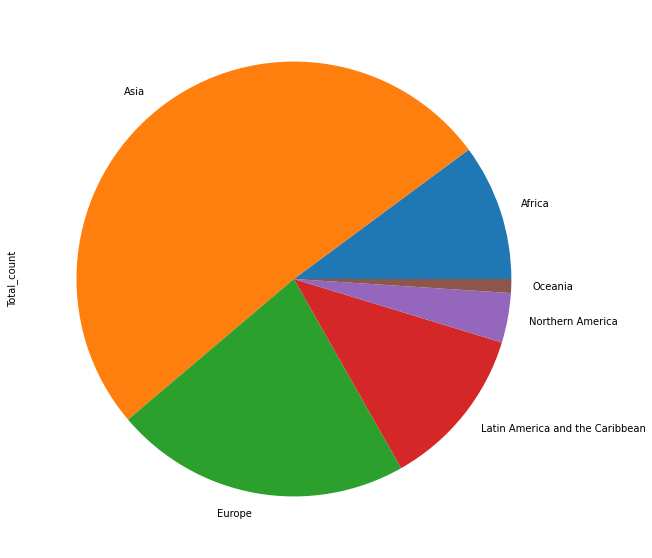

In [8]:
#create pie charts
#baseline pie chart
df_continents['Total_count'].plot(kind='pie',figsize=(10,10))
plt.show()

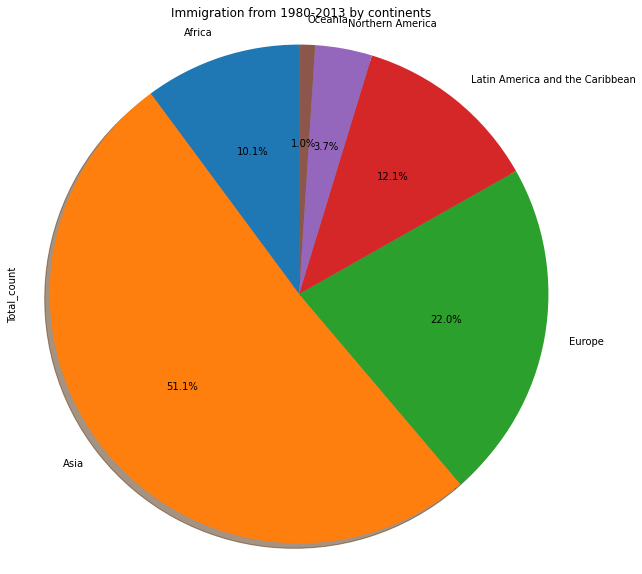

In [9]:
df_continents['Total_count'].plot(kind='pie',figsize=(10,10),startangle=90,autopct='%1.1f%%',shadow=True)

plt.title('Immigration from 1980-2013 by continents')
plt.axis('equal') #looks like a circle
plt.show()

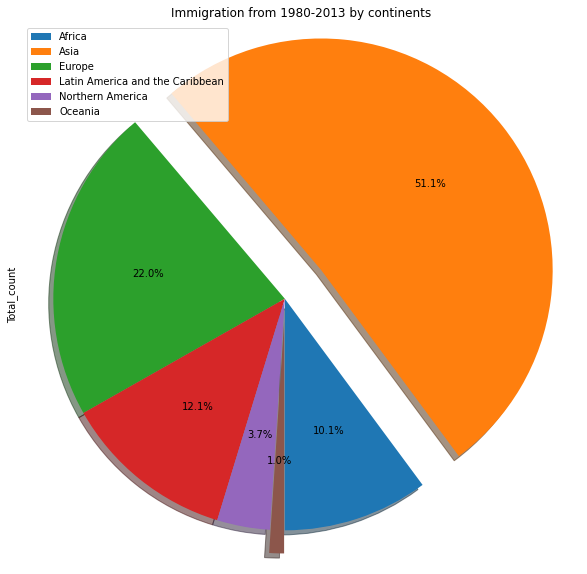

In [12]:
explodelist=[0,0.2,0,0,0,0.1]   # This is for having a part of pie chart detached from the circle
df_continents['Total_count'].plot(kind='pie',
                                  figsize=(10,10),
                                  startangle=270,
                                  autopct='%1.1f%%',
                                  shadow=True,
                                  labels=None,
                                  explode=explodelist)
plt.title('Immigration from 1980-2013 by continents')
plt.axis('equal') #looks like a circle
plt.legend(labels=df_continents.index,loc='upper left')
plt.show()

In [13]:
#plot pie chart of dev status
df_devstatus=df_can.groupby('Development-status',axis='index').sum()

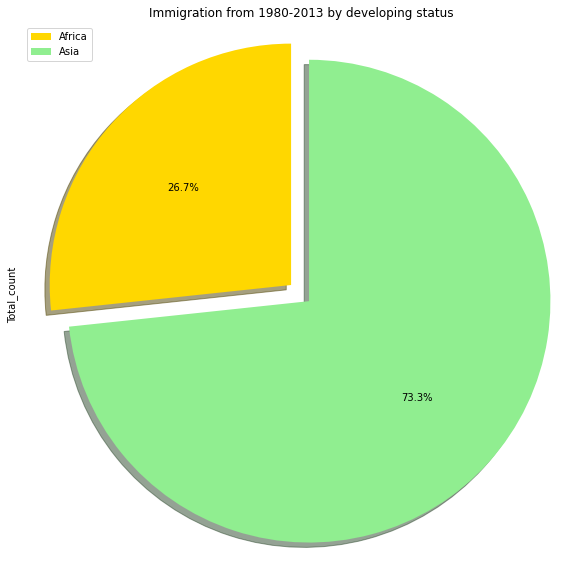

In [14]:
colorlist=['gold','lightgreen']
explodelist=[0,0.1]
df_devstatus['Total_count'].plot(kind='pie',
                                  figsize=(10,10),
                                  startangle=90,
                                  autopct='%1.1f%%',
                                  shadow=True,
                                  labels=None,
                                  colors=colorlist,
                                  explode=explodelist)

plt.title('Immigration from 1980-2013 by developing status')
plt.axis('equal') #looks like a circle
plt.legend(labels=df_continents.index,loc='upper left')
plt.show()

In [15]:
##1. By Continent-region------pie chart 
##use colorlist explode pct figsize title add axes add legend remove labels and use shadows

In [16]:
df_continentregion=df_can.groupby('Continent-region',axis='index').sum()

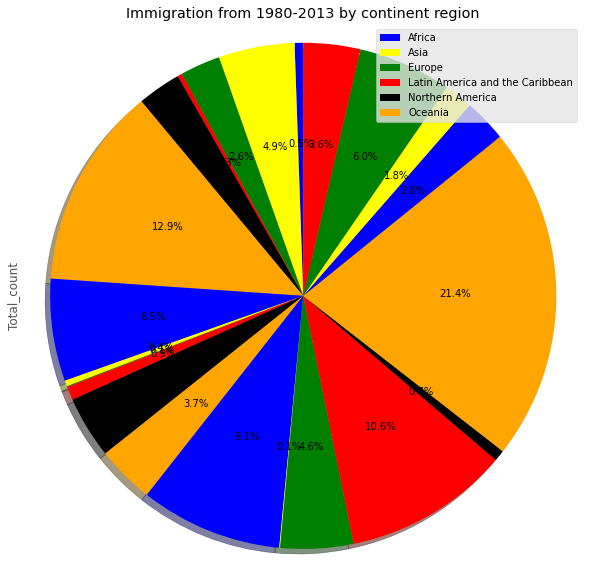

In [54]:
colorlist=['blue','yellow','green','red','black','orange']
df_continentregion['Total_count'].plot(kind='pie',
                                  figsize=(10,10),
                                  startangle=90,
                                  autopct='%1.1f%%',
                                  shadow=True,
                                  labels=None,
                                  colors=colorlist
                                  )

plt.title('Immigration from 1980-2013 by continent region')
plt.axis('equal') #looks like a circle
plt.legend(labels=df_continents.index,loc='upper right')
plt.show()

In [19]:
dfIndia=df_can.loc['India',years]

In [74]:
dfIndiapak

Country,India,Pakistan
1980,8880,978
1981,8670,972
1982,8147,1201
1983,7338,900
1984,5704,668
1985,4211,514
1986,7150,691
1987,10189,1072
1988,11522,1334
1989,10343,2261


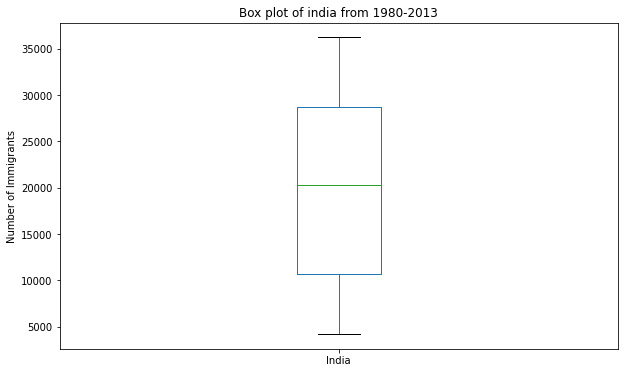

In [21]:
dfIndia.plot(
    kind='box',
    figsize=(10,6)
)
plt.title('Box plot of india from 1980-2013')
plt.ylabel('Number of Immigrants')
plt.show()

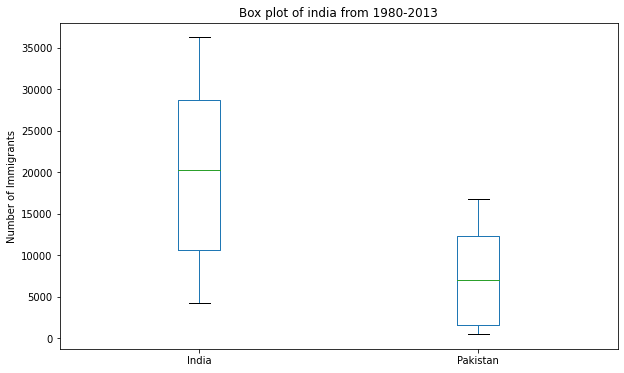

In [22]:
dfIndiapak=df_can.loc[['India','Pakistan'],years].transpose()
dfIndiapak.plot(
    kind='box',
    figsize=(10,6)
)
plt.title('Box plot of india from 1980-2013')
plt.ylabel('Number of Immigrants')
plt.show()

In [64]:
df_can

,Continent,Continent-region,DEV,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total_count
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,59541
Albania,Europe,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,16600
Algeria,Africa,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,70341
American Samoa,Oceania,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,908
Andorra,Europe,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,902,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112,98048
Western Sahara,Africa,Northern Africa,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,904
Yemen,Asia,Western Asia,902,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217,3887


In [65]:
asia = df_can[(df_can['Continent']=='Asia')].sort_values('Total_count', ascending=False).head()
eur = df_can[(df_can['Continent']=='Europe')].sort_values('Total_count', ascending=False).head()
afr = df_can[(df_can['Continent']=='Africa')].sort_values('Total_count', ascending=False).head()
ocn = df_can[(df_can['Continent']=='Oceania')].sort_values('Total_count', ascending=False).head()
asia = asia[years].transpose()
eur = eur[years].transpose()
afr = afr[years].transpose()
ocn = ocn[years].transpose()

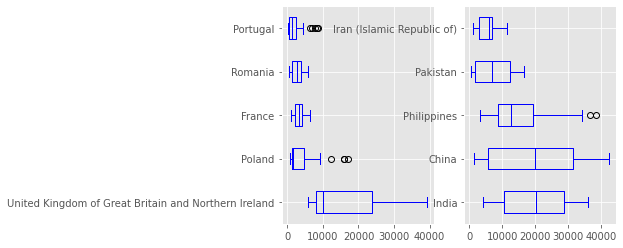

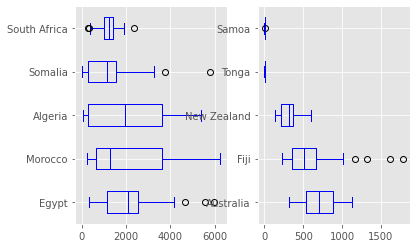

In [66]:
 # making subplots
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
fig2 = plt.figure()
ax3 = fig2.add_subplot(1,2,1)
ax4 = fig2.add_subplot(1,2,2)
eur.plot(kind='box', color='blue', vert=False, ax=ax1)
asia.plot(kind='box', color='blue', vert=False, ax=ax2)
afr.plot(kind='box', color='blue', vert=False, ax=ax3)
ocn.plot(kind='box', color='blue', vert=False, ax=ax4)

In [67]:
# Outlier Detection
temp = asia.describe()
Q1 = temp.loc['25%', 'Philippines']
Q3 = temp.loc['75%', 'Philippines']
IQR = Q3-Q1

Outlier1 = Q3 + 1.5*IQR
Outlier2 = Q1 - 1.5*IQR
print(Outlier1)
print(Outlier2)

asia[asia['Philippines']>Outlier1]

35128.0
-7216.0


Country,India,China,Philippines,Pakistan,Iran (Islamic Republic of)
2010,34235,30391,38617,6811,7477
2011,27509,28502,36765,7468,7479


In [114]:
dfIndiapak

Country,India,Pakistan
1980,8880,978
1981,8670,972
1982,8147,1201
1983,7338,900
1984,5704,668
1985,4211,514
1986,7150,691
1987,10189,1072
1988,11522,1334
1989,10343,2261


In [125]:
dfIndiapak.reset_index(inplace=True)
dfIndiapak.rename(columns={'Country':'index','index':'Year'}, inplace=True)
dfIndiapak.head()

Country,Year,India,Pakistan
0,1980,8880,978
1,1981,8670,972
2,1982,8147,1201
3,1983,7338,900
4,1984,5704,668


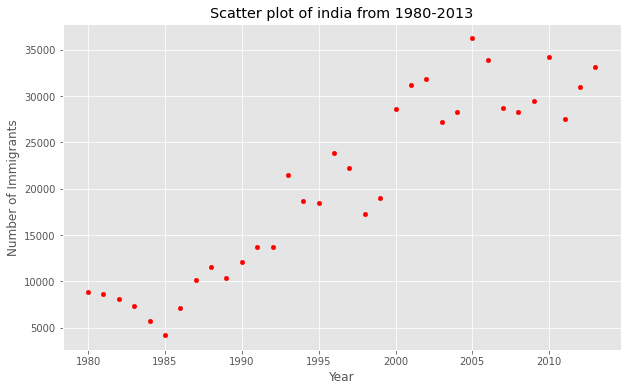

In [129]:
# Scatter and Bubble Plots
x=dfIndiapak['Year'].astype('int64')
y=dfIndiapak['India']
dfIndiapak.plot(
    kind='scatter',
    x='Year',
    y='India',
    color='red',
    figsize=(10,6)
)
plt.title('Scatter plot of india from 1980-2013')
plt.ylabel('Number of Immigrants')
plt.show()

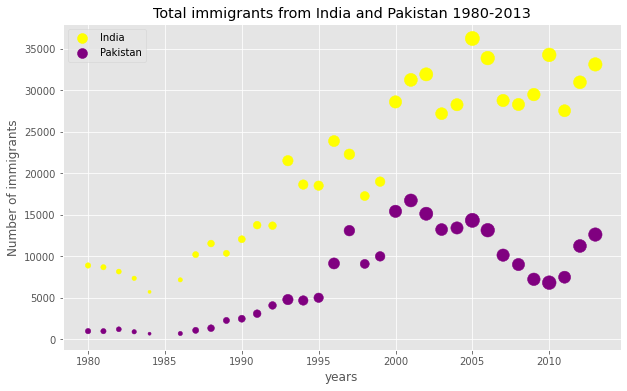

In [134]:
# Bubble Plot
norm_india = (dfIndiapak['India'] - dfIndiapak['India'].min()) / (dfIndiapak['India'].max() - dfIndiapak['India'].min())
norm_pak = (dfIndiapak['Pakistan'] - dfIndiapak['Pakistan'].min()) / (dfIndiapak['Pakistan'].max() - dfIndiapak['Pakistan'].min())
ax0 = dfIndiapak.plot(kind='scatter', x='Year', y='India', color='yellow', s=norm_india*200, figsize=(10,6))
dfIndiapak.plot(kind='scatter', x='Year', y='Pakistan', color='purple', s=norm_india*200, figsize=(10,6), ax=ax0)
plt.title('Total immigrants from India and Pakistan 1980-2013')
plt.xlabel("years")
plt.ylabel("Number of immigrants")
ax0.legend(['India','Pakistan'], loc='upper left')
plt.show()

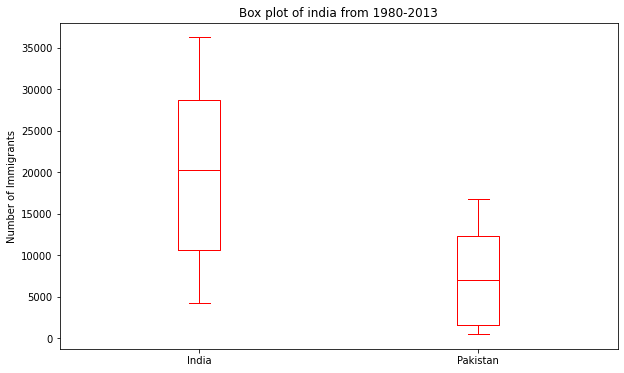

In [23]:
# Boxplots
dfIndiapak=df_can.loc[['India','Pakistan'],years].transpose()
dfIndiapak.plot(
    kind='box',
    figsize=(10,6),
    color='red'
)
plt.title('Box plot of india from 1980-2013')
plt.ylabel('Number of Immigrants')
plt.show()

In [25]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts
mpl.style.use('ggplot') # optional: for ggplot-like style
# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


In [ ]:
# WAFFLE CHARTS

In [26]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

In [27]:
# let's create a new dataframe for these three countries 
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]
# let's take a look at our dataframe
df_dsn

,Continent,Continent-region,DEV,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total_count
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,901,Developed regions,272,293,299,106,93,73,93,109,129,129,118,111,158,186,93,111,70,83,63,81,93,81,70,89,89,62,101,97,108,81,92,93,94,81,4802
Norway,Europe,Northern Europe,901,Developed regions,116,77,106,51,31,54,56,80,73,76,83,103,74,92,60,65,70,104,31,36,56,78,74,77,73,57,53,73,66,75,46,49,53,59,3228
Sweden,Europe,Northern Europe,901,Developed regions,281,308,222,176,128,158,187,198,171,182,130,167,179,203,192,176,161,151,123,170,138,184,149,161,129,205,139,193,165,167,159,134,140,140,6767


In [32]:
width = 40 # width of chart
height = 10 # height of chart
categories = df_dsn.index.values # categories
values = df_dsn['Total_count'] # correponding values of categories
colormap = plt.cm.coolwarm # color map class

Total number of tiles is 400
Denmark: 130
Norway: 87
Sweden: 183


<Figure size 432x288 with 0 Axes>

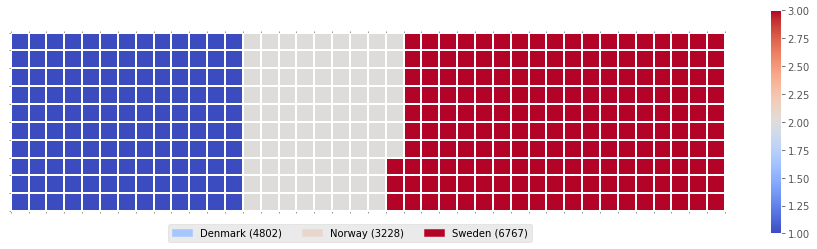

In [33]:
create_waffle_chart(categories, values, height, width, colormap)

In [ ]:
# Word Clouds

In [39]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

# download file and save as alice_novel.txt
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/alice_novel.txt

# open the file and read it into a variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()
    
print ('File downloaded and saved!')

/bin/bash: conda: command not found
Wordcloud is installed and imported!
File downloaded and saved!


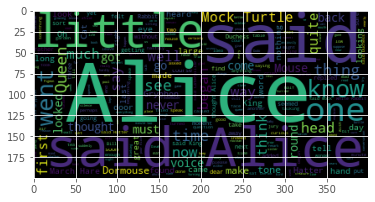

<Figure size 1440x1440 with 0 Axes>

In [94]:
#Step 1: stopwords removals - 
stopwordsremove = set(STOPWORDS)
#Step2: create an object of class WordCloud
alice_wc = WordCloud(
    max_words=2000,
    stopwords=stopwordsremove
)
#step3 : use object to call function
alice_wc.generate(alice_novel)
plt.imshow(alice_wc)
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
plt.show()

In [95]:
# Maps
import folium
worldmap = folium.Map(location=[56.130, -106.35], zoom_start=10)
worldmap

In [96]:
# Getting the Dataset
incidents = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')
print('Dataset downloaded and read into a pandas dataframe!')
print(incidents.head())
print(incidents.shape)

Dataset downloaded and read into a pandas dataframe!
   IncidntNum  ...            PdId
0   120058272  ...  12005827212120
1   120058272  ...  12005827212168
2   141059263  ...  14105926363010
3   160013662  ...  16001366271000
4   160002740  ...  16000274071000

[5 rows x 13 columns]
(150500, 13)


In [97]:
limit = 100
inc = incidents.iloc[0:limit,:]

In [98]:
latitude = 37.77
longitude = -122.42
map1 = folium.Map(location = [latitude, longitude], zoom_start=12)
map1

In [100]:
#given information about city coordinates
latitude= 37.77
longitude = -122.42

#create map using folium library and Map class
map1 = folium.Map(location = [latitude, longitude], zoom_start=12)
map1

#incident we will impose on the map
incident = folium.map.FeatureGroup()

#reduce size of dataset
df1 = incidents.iloc[0:limit,:]

#loop through the crimes by their lat Y and long X and create markers
lats = list(df1.Y)
longs = list(df1.X)
labels = list(df1.Category)

for lat, long, labs in zip(lats, longs, labels):
        folium.CircleMarker([lat, long], popup=labs, radius=5, color='yellow', fill=True, 
                            fill_color='blue').add_to(map1)

#add incidents/crimes to the map
map1